# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities


['arraial do cabo',
 'punta arenas',
 'mogoytuy',
 'rikitea',
 'cape town',
 'bathsheba',
 'tautira',
 'rio verde de mato grosso',
 'ryotsu',
 'ruidoso',
 'isla vista',
 'mataura',
 'adrar',
 'hithadhoo',
 'new norfolk',
 'bluff',
 'ushuaia',
 'bredasdorp',
 'busselton',
 'muros',
 'afsin',
 'puerto ayora',
 'albany',
 'lagoa',
 'hilo',
 'ribeira grande',
 'port-cartier',
 'tiksi',
 'upernavik',
 'touros',
 'georgetown',
 'baruun-urt',
 'dolbeau',
 'nyurba',
 'dharchula',
 'nuuk',
 'port alfred',
 'weihai',
 'alofi',
 'taltal',
 'pailon',
 'chilca',
 'provideniya',
 'flinders',
 'nizhneyansk',
 'alice springs',
 'hermanus',
 'chokurdakh',
 'la ronge',
 'ponta do sol',
 'taolanaro',
 'srandakan',
 'nanakuli',
 'vaini',
 'tilichiki',
 'kurilsk',
 'dikson',
 'mar del plata',
 'mount isa',
 'qaanaaq',
 'kapaa',
 'pestyaki',
 'gusau',
 'chapais',
 'arbazh',
 'lebu',
 'mecca',
 'bontang',
 'banamba',
 'taoudenni',
 'souillac',
 'grand river south east',
 'vardo',
 'saleaula',
 'shingu',
 'ca

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=a41a4be7c0f187521f76ffaa941154e1e676e4f7&units=Imperial&q=


In [17]:
##PERFORM API CALLS
#Set variables for url and city 
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "timizart"

#Set get url 
api_url = url + "appid=" + "491741fa59b6698fc1eec7126eb5d2c0" + "&q=" + city + "&units=imperial"

#Perform API call with json response
weather_response = requests.get(api_url)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': 4.2667, 'lat': 36.8},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 53.69,
  'feels_like': 53.22,
  'temp_min': 53.69,
  'temp_max': 53.69,
  'pressure': 1010,
  'humidity': 95,
  'sea_level': 1010,
  'grnd_level': 972},
 'visibility': 4642,
 'wind': {'speed': 9.8, 'deg': 48, 'gust': 14.07},
 'clouds': {'all': 100},
 'dt': 1618530244,
 'sys': {'country': 'DZ', 'sunrise': 1618549639, 'sunset': 1618597060},
 'timezone': 3600,
 'id': 2476396,
 'name': 'Timizart',
 'cod': 200}

In [ ]:
for index, row in cities_df[0:608].iterrows():
    try:
        #All query and param data must be within indentation
        row = row.copy()
        city= row['City']
        print(city)

        url = "http://api.openweathermap.org/data/2.5/weather?"

        query_url = url + "appid=" + "491741fa59b6698fc1eec7126eb5d2c0" + "&q=" + city + "&units=imperial"
        print(query_url)
        
        #API call
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        weather_json

        #Write info to df
        cities_df.at[index,"Temp"]= weather_json["main"]["temp"]
        cities_df.at[index,"Humidity"]= weather_json["main"]["humidity"]
        cities_df.at[index,"Cloudiness"]= weather_json["clouds"]["all"]
        cities_df.at[index,"Wind Speed"]= weather_json["wind"]["speed"]
        cities_df.at[index,"lat"]= weather_json["coord"]["lat"]
        cities_df.at[index,"lon"]= weather_json["coord"]["lon"]
        
    #Error exception for cities with no data
    except KeyError:
        print(f"No data in, {row.copy()} keep NaN in df.")

#Display the df
cities_df

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
cities_df = pd.DataFrame({
    "City":cities,
    "Temp":np.nan,
    "Humidity":np.nan,
    "Cloudiness":np.nan,
    "Wind Speed":np.nan
})
#Display the df
cities_df

,City,Temp,Humidity,Cloudiness,Wind Speed
0,arraial do cabo,NaN,NaN,NaN,NaN
1,punta arenas,NaN,NaN,NaN,NaN
2,mogoytuy,NaN,NaN,NaN,NaN
3,rikitea,NaN,NaN,NaN,NaN
4,cape town,NaN,NaN,NaN,NaN
...,...,...,...,...,...
621,pochutla,NaN,NaN,NaN,NaN
622,gazanjyk,NaN,NaN,NaN,NaN
623,marquette,NaN,NaN,NaN,NaN
624,escuinapa,NaN,NaN,NaN,NaN


In [25]:
for index, row in cities_df[0:608].iterrows():
    try:
        #All query and param data must be within indentation
        row = row.copy()
        city= row['City']
#         print(city)

        url = "http://api.openweathermap.org/data/2.5/weather?"

        query_url = url + "appid=" + "491741fa59b6698fc1eec7126eb5d2c0" + "&q=" + city + "&units=imperial"
#         print(query_url)
        
        #API call
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
#         weather_json

        #Write info to df
        cities_df.at[index,"Temp"]= weather_json["main"]["temp"]
        cities_df.at[index,"Humidity"]= weather_json["main"]["humidity"]
        cities_df.at[index,"Cloudiness"]= weather_json["clouds"]["all"]
        cities_df.at[index,"Wind Speed"]= weather_json["wind"]["speed"]
        cities_df.at[index,"lat"]= weather_json["coord"]["lat"]
        cities_df.at[index,"lon"]= weather_json["coord"]["lon"]
        
    #Error exception for cities with no data
    except KeyError:
        print(f"No data in, {row.copy()} keep NaN in df.")

#Display the df
cities_df

No data in, City          dolbeau
Temp              NaN
Humidity          NaN
Cloudiness        NaN
Wind Speed        NaN
lat               NaN
lon               NaN
Name: 32, dtype: object keep NaN in df.
No data in, City          nizhneyansk
Temp                  NaN
Humidity              NaN
Cloudiness            NaN
Wind Speed            NaN
lat                   NaN
lon                   NaN
Name: 44, dtype: object keep NaN in df.
No data in, City          taolanaro
Temp                NaN
Humidity            NaN
Cloudiness          NaN
Wind Speed          NaN
lat                 NaN
lon                 NaN
Name: 50, dtype: object keep NaN in df.
No data in, City          grand river south east
Temp                             NaN
Humidity                         NaN
Cloudiness                       NaN
Wind Speed                       NaN
lat                              NaN
lon                              NaN
Name: 71, dtype: object keep NaN in df.
No data in, City          sal

No data in, City          bargal
Temp             NaN
Humidity         NaN
Cloudiness       NaN
Wind Speed       NaN
lat              NaN
lon              NaN
Name: 378, dtype: object keep NaN in df.
No data in, City          burkhala
Temp               NaN
Humidity           NaN
Cloudiness         NaN
Wind Speed         NaN
lat                NaN
lon                NaN
Name: 381, dtype: object keep NaN in df.
No data in, City          himora
Temp             NaN
Humidity         NaN
Cloudiness       NaN
Wind Speed       NaN
lat              NaN
lon              NaN
Name: 382, dtype: object keep NaN in df.
No data in, City          bur gabo
Temp               NaN
Humidity           NaN
Cloudiness         NaN
Wind Speed         NaN
lat                NaN
lon                NaN
Name: 417, dtype: object keep NaN in df.
No data in, City          inderborskiy
Temp                   NaN
Humidity               NaN
Cloudiness             NaN
Wind Speed             NaN
lat                    Na

,City,Temp,Humidity,Cloudiness,Wind Speed,lat,lon
0,arraial do cabo,75.09,65.0,46.0,13.00,-22.9661,-42.0278
1,punta arenas,48.09,81.0,75.0,6.91,-53.1500,-70.9167
2,mogoytuy,35.42,32.0,3.0,11.48,51.2833,114.9167
3,rikitea,78.31,72.0,70.0,7.99,-23.1203,-134.9692
4,cape town,65.34,68.0,0.0,6.91,-33.9258,18.4232
...,...,...,...,...,...,...,...
621,pochutla,NaN,NaN,NaN,NaN,NaN,NaN
622,gazanjyk,NaN,NaN,NaN,NaN,NaN,NaN
623,marquette,NaN,NaN,NaN,NaN,NaN,NaN
624,escuinapa,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
cities_df.head()

,City,Temp,Humidity,Cloudiness,Wind Speed,lat,lon
0,arraial do cabo,75.09,65.0,46.0,13.00,-22.9661,-42.0278
1,punta arenas,48.09,81.0,75.0,6.91,-53.1500,-70.9167
2,mogoytuy,35.42,32.0,3.0,11.48,51.2833,114.9167
3,rikitea,78.31,72.0,70.0,7.99,-23.1203,-134.9692
4,cape town,65.34,68.0,0.0,6.91,-33.9258,18.4232


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
cities_df.describe()


,Temp,Humidity,Cloudiness,Wind Speed,lat,lon
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,58.625494,69.856373,55.122083,8.144865,18.282077,18.489547
std,21.360538,22.472065,36.783728,5.716171,33.703043,88.987619
min,-16.470000,4.000000,0.000000,0.450000,-54.800000,-179.166700
25%,45.050000,58.000000,20.000000,3.650000,-8.836800,-63.057800
50%,62.600000,75.000000,65.000000,6.910000,19.674200,25.570100
75%,76.590000,87.000000,90.000000,11.500000,47.166600,96.527800
max,93.470000,100.000000,100.000000,33.380000,78.218600,178.416700


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

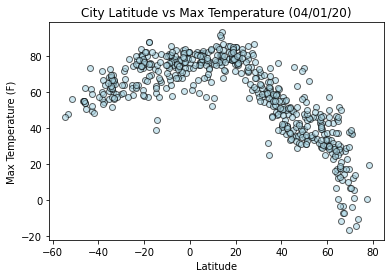

In [47]:
plt.scatter(cities_df['lat'], cities_df['Temp'], marker="o", facecolors="lightblue", edgecolors="black", alpha = 0.6)

#Format scatter plot

plt.title("City Latitude vs Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Temperature.png")
plt.show()

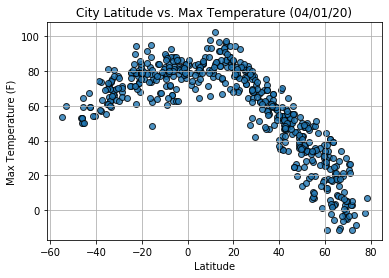

## Latitude vs. Humidity Plot

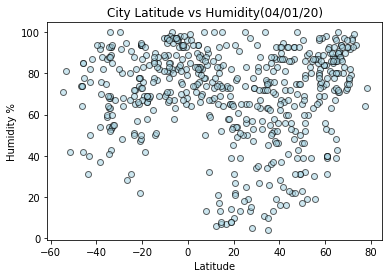

In [45]:
plt.scatter(cities_df['lat'], cities_df['Humidity'], marker="o", facecolors="lightblue", edgecolors="black",alpha = 0.6)

#Format scatter plot
plt.title("City Latitude vs Humidity(04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.savefig("Humidity.png")
plt.show()

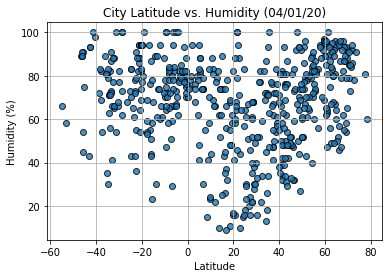

## Latitude vs. Cloudiness Plot

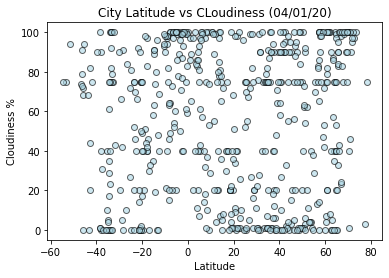

In [49]:
plt.scatter(cities_df['lat'], cities_df['Cloudiness'], marker="o", facecolors="lightblue", edgecolors="black", alpha = 0.6)

#Format scatter plot
plt.title("City Latitude vs CLoudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.savefig("Cloudiness.png")
plt.show()

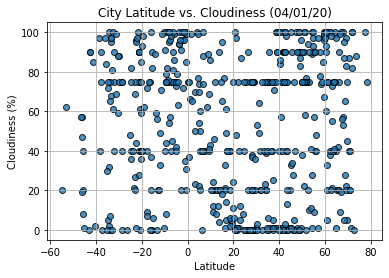

## Latitude vs. Wind Speed Plot

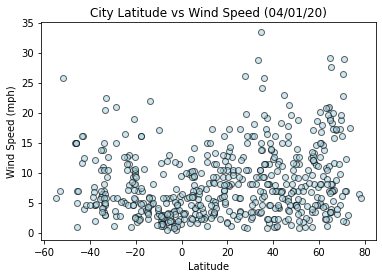

In [50]:
plt.scatter(cities_df['lat'], cities_df['Wind Speed'], marker="o", facecolors="lightblue", edgecolors="black", alpha = 0.6)

#Format scatter plot
plt.title("City Latitude vs Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Wind Speed.png")
plt.show()

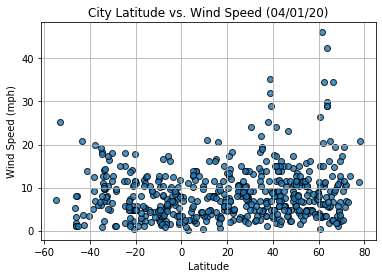

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [55]:
northern_df = cities_df.loc[pd.to_numeric(cities_df["lat"]).astype(float) > 0, :]
southern_df = cities_df.loc[pd.to_numeric(cities_df["lat"]).astype(float) < 0, :]

The r-squared is: -0.8738215639613096


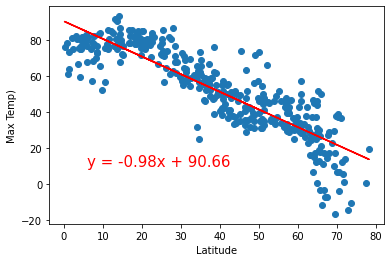

In [72]:
x_values = pd.to_numeric(northern_df['lat']).astype(float)
y_values = pd.to_numeric(northern_df['Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp)')
print(f"The r-squared is: {rvalue}")
plt.savefig("northern temp vs lat.png")

plt.show()

The r-value is: 0.46937863826630627


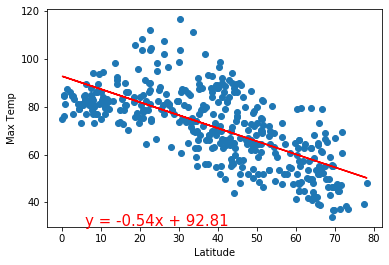

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6480269822988347


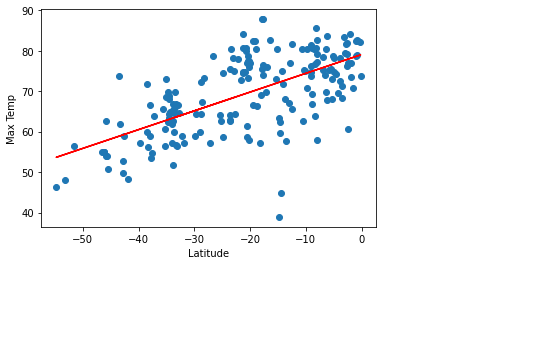

In [73]:
x_values = pd.to_numeric(southern_df['lat']).astype(float)
y_values = pd.to_numeric(southern_df['Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.savefig("southern temp vs lat.png")

plt.show()

The r-value is: 0.6082708688906918


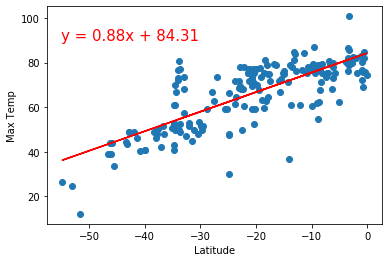

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.19x + 59.84
The r-squared is: 0.15893564624067244


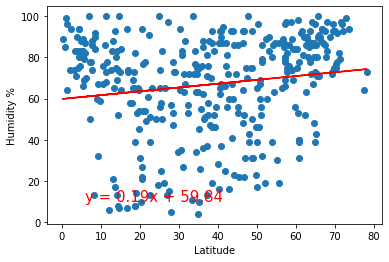

In [76]:
x_values = pd.to_numeric(northern_df['lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue}")
plt.savefig("northern hum vs lat.png")

plt.show()

The r-value is: 0.000543987878808455


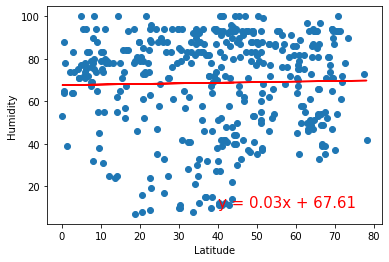

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.41x + 84.18
The r-squared is: 0.3355191791659159


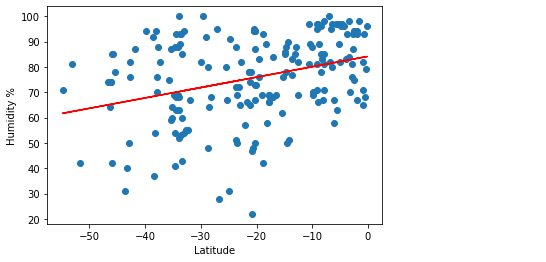

In [77]:
x_values = pd.to_numeric(southern_df['lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue}")
plt.savefig("southern hum vs lat.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.16x + 47.66
The r-squared is: 0.0890778221658468


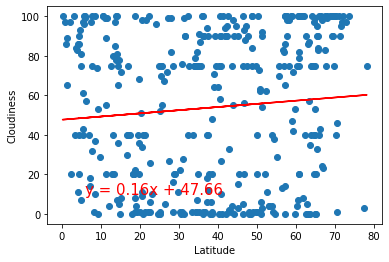

In [79]:

x_values = pd.to_numeric(northern_df['lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.savefig("northern cloudiness vs lat.png")

plt.show()

Regression line equation is: y = 0.68x + 71.87
The r-squared is: 0.26639546867241426


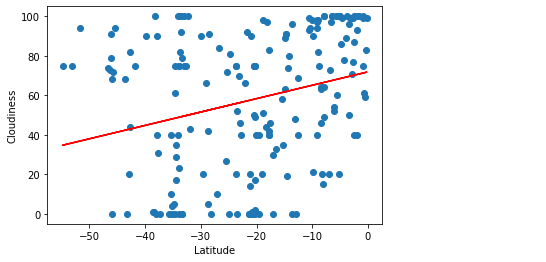

In [80]:
x_values = pd.to_numeric(southern_df['lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.savefig("southern cloudiness vs lat.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


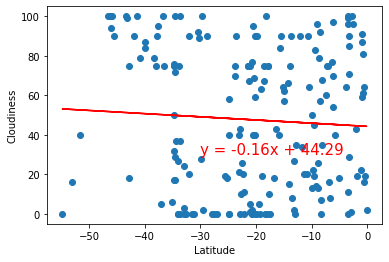

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.06x + 6.51
The r-squared is: 0.21948570715112342


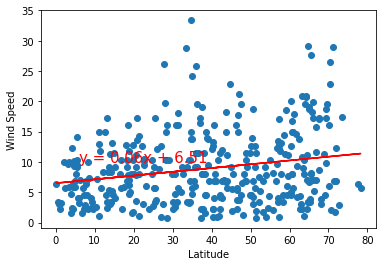

In [82]:
x_values = pd.to_numeric(northern_df['lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.savefig("northern Wind speed vs lat.png")

plt.show()

The r-value is: 0.04019723576144484


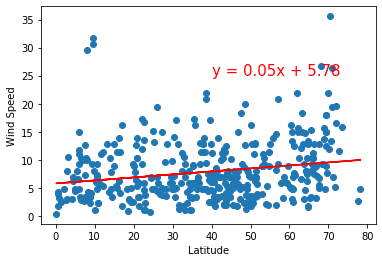

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.14x + 3.8
The r-squared is: -0.38269339509978084


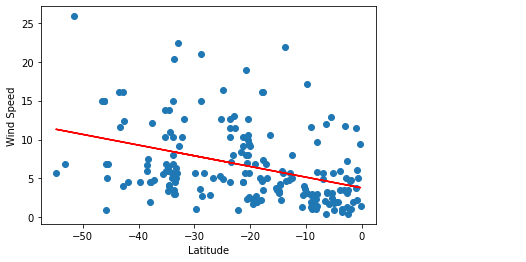

In [83]:
x_values = pd.to_numeric(southern_df['lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.savefig("southern Wind speed vs lat.png")

plt.show()

The r-value is: 0.017128274759839232


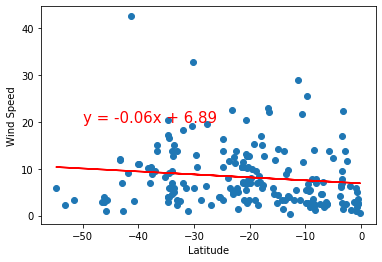